In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
from transformers import TFRobertaModel
import pandas as pd
import numpy as np
from transformers import BertTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

tokenizer_save_path = '/content/drive/MyDrive/tokenizer/'


tokenizer = BertTokenizer.from_pretrained(tokenizer_save_path)

# 데이터 로드
file_path = '/content/drive/MyDrive/val_sorted_paragraphs.csv'
df = pd.read_csv(file_path)



test_target = ['대안제시', '글짓기', '찬성반대', '주장', '설명글']

for target in test_target:

  model_path = f'/content/drive/MyDrive/base_256_{target}.h5'  # 모델 경로 지정
  if target == '설명글': model_path = '/content/drive/MyDrive/base_512_설명글.h5'

  model = load_model(model_path, custom_objects={'TFRobertaModel': TFRobertaModel})
  df = pd.read_csv(file_path)
  df = df[df['class']==target]

  paragraphs = df['paragraphs'].values
  scores = df['score'].values
  max_length = 512
  X_ids = np.zeros((len(paragraphs), max_length))
  X_mask = np.zeros((len(paragraphs), max_length))

  for i, paragraph in enumerate(paragraphs):
      tokens = tokenizer.encode_plus(paragraph, max_length=max_length, truncation=True,
                                    padding='max_length', add_special_tokens=True,
                                    return_tensors='tf')
      X_ids[i, :] = tokens['input_ids']
      X_mask[i, :] = tokens['attention_mask']

  predictions = model.predict([X_ids, X_mask])


  mse = mean_squared_error(scores, predictions)
  mae = mean_absolute_error(scores, predictions)
  rmse = np.sqrt(mse)

  print('불용어 제거 전 모델 성능 평가')
  print(f'{target}의 성능')
  print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
  print(f'======================================')

29/29 [==============================] - 42s 1s/step
불용어 제거 전 모델 성능 평가
대안제시의 성능
MSE: 40.12066068142136, MAE: 4.410586042993095, RMSE: 6.334087201911682
21/21 [==============================] - 30s 1s/step
불용어 제거 전 모델 성능 평가
글짓기의 성능
MSE: 47.35690830111941, MAE: 4.015150071981197, RMSE: 6.881635583283919
31/31 [==============================] - 42s 1s/step
불용어 제거 전 모델 성능 평가
찬성반대의 성능
MSE: 45.74480671917543, MAE: 4.435199349701775, RMSE: 6.763490719974075
47/47 [==============================] - 62s 1s/step
불용어 제거 전 모델 성능 평가
주장의 성능
MSE: 54.43788585540554, MAE: 5.097686766249931, RMSE: 7.378203430063821
58/58 [==============================] - 76s 1s/step
불용어 제거 전 모델 성능 평가
설명글의 성능
MSE: 18.51676177848365, MAE: 3.1853761075376226, RMSE: 4.30311070953138


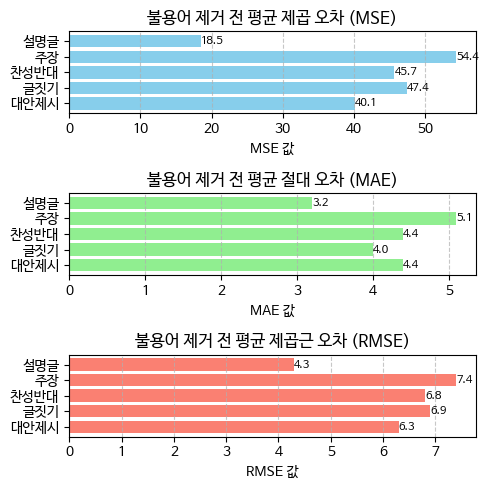

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic')

tasks = ['대안제시', '글짓기', '찬성반대', '주장', '설명글']
mse = [40.1, 47.4, 45.7, 54.4, 18.5]
mae = [4.4, 4.0, 4.4, 5.1, 3.2]
rmse = [6.3, 6.9, 6.8, 7.4, 4.3]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 5))

bars_mse = axes[0].barh(tasks, mse, color='skyblue')
axes[0].set_title('불용어 제거 전 평균 제곱 오차 (MSE)')
axes[0].set_xlabel('MSE 값')

bars_mae = axes[1].barh(tasks, mae, color='lightgreen')
axes[1].set_title('불용어 제거 전 평균 절대 오차 (MAE)')
axes[1].set_xlabel('MAE 값')

bars_rmse = axes[2].barh(tasks, rmse, color='salmon')
axes[2].set_title('불용어 제거 전 평균 제곱근 오차 (RMSE)')
axes[2].set_xlabel('RMSE 값')


for ax in axes:
    ax.grid(axis='x', linestyle='--', alpha=0.7)


def add_numbers(bars, axes):
    for bar, value in zip(bars, [round(rect.get_width(), 1) for rect in bars]):
        axes.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value}',
                  va='center', ha='left', fontsize=8, color='black')

add_numbers(bars_mse, axes[0])
add_numbers(bars_mae, axes[1])
add_numbers(bars_rmse, axes[2])

plt.tight_layout()
plt.show()


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/